# Find similar images using CLIP embeddings

In this notebook you learn how to find similar images using the cosine similarity.

First, we'll get an understanding how the maths work using a basic example
Second, we'll calculatie the similarity between two images
Third, we'll find similar images from a set of images. 

### TO DO: Run the notebook and do the exercises

### Contents
1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)
2. Calculate cosine similarity for 2 images
3. Find similar images with cosine similarity

### Sources
- https://nl.wikipedia.org/wiki/Cosinusgelijkenis
- https://openai.com/research/clip
- https://medium.com/@jeremy-k/unlocking-openai-clip-part-2-image-similarity-bf0224ab5bb0
- https://www.geeksforgeeks.org/how-to-calculate-cosine-similarity-in-python/
- https://www.geeksforgeeks.org/python-measure-similarity-between-two-sentences-using-cosine-similarity/

## 1. Intro:  calculate the cosine similarity (nl: cosinusgelijkenis)

In [4]:
#Define two points

# Choose values [1-10] (integers/floats) to properly plot it below

# point 1
p1x = 4
p1y = 3

#point 2
p2x = 3
p2y = 4

In [5]:
#function to calculate cosine similarity
def cosine_similarity(a, b):
    dot_product = sum(x * y for x, y in zip(a, b))
    magnitude_a = sum(x * x for x in a) ** 0.5
    magnitude_b = sum(x * x for x in b) ** 0.5
    return dot_product / (magnitude_a * magnitude_b)

cosine_similarity((p1x,p1y), (p2x,p2y))

0.96

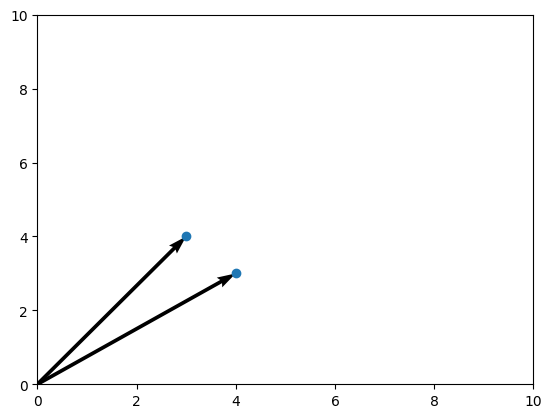

In [6]:
#plot the points and create a vector from 0,0
%matplotlib inline
import matplotlib.pyplot as plt 

#get points and plot them
points_x = p1x, p2x
points_y = p1y, p2y
plt.plot(points_x, points_y, 'o') 

#plot vectors 
plt.quiver([0, 0], [0, 0], [p1x, p2x], [p1y,p2y], angles='xy', scale_units='xy', scale=1)

#plot axes and show it
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

### Exercise 1: 
1. play with the points and see what happens
2. create two examples:
    - Where cosine similarity is 1
    - Where cosine similarity is 0

## 2. Calculate cosine similarity for 2 images

In [ ]:
# first install packages! Uncomment if necessary
%pip install torch torchvision
%pip install git+https://github.com/openai/CLIP.git

Here we will use two images and calculate how similar they are. 

To do so we'll create embeddings using CLIP. CLIP has several ways of creating embeddings, but here we'll use a standard Vision Transformer (ViT).

In [1]:
# import packages
from PIL import Image
import torch
import torch.nn as nn
import clip

#check device
device = "cuda" if torch.cuda.is_available() else "cpu"

#select embedding model. We use a Vision Transformer (ViT) embedding.
model, preprocess = clip.load("ViT-B/32", device=device)

In [2]:
#First, use the images given. This is a similar image of car (one is smaller)
image1 = "car512.png"
image2= "car256.png"

In [ ]:
#create embeddings for the images

image1_preprocess = preprocess(Image.open(image1)).unsqueeze(0).to(device)
image1_features = model.encode_image( image1_preprocess)

image2_preprocess = preprocess(Image.open(image2)).unsqueeze(0).to(device)
image2_features = model.encode_image( image2_preprocess)

In [ ]:
#calculate the cosine similarity
cos = torch.nn.CosineSimilarity(dim=0)

similarity = cos(image1_features[0],image2_features[0]).item()
similarity = (similarity+1)/2

print("Image similarity: ", similarity)

Above we've calculated the cosine similarity > 0.99 for the similar images. Now replace one image with another and run the cells again. 


## Find similar images with cosine similarity

In [11]:
%%time
import torch
import clip
from PIL import Image
import os
import itertools
import torch.nn as nn

#check your device
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

#select the model for the embeddings. Here we use a Vision Transformer (ViT)
model, preprocess = clip.load("ViT-B/32", device=device)

#create a list of the given images
dataset_folder = './elephants/'
images = []
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        if file.endswith(('jpg','jpeg')):
            images.append(  root  + '/'+ file)


#Set the input image and create it's embedding
original_image = './elephants/1200px-Elephant_near_ndutu.jpg'
input_image = preprocess(Image.open(original_image)).unsqueeze(0).to(device) #
input_image_features = model.encode_image(input_image)

# Create embeddings for other images, do similarity search and store in a python dictionary.
result = {}
for img in images:
    with torch.no_grad():
        image_preprocess = preprocess(Image.open(img)).unsqueeze(0).to(device)
        image_features = model.encode_image(image_preprocess)
        cos = torch.nn.CosineSimilarity(dim=0)
        sim = cos(image_features[0],input_image_features[0]).item()
        sim = (sim+1)/2
        result[img]=sim


#sort the results and print the top 3
sorted_value = sorted(result.items(), key=lambda x:x[1], reverse=True)
sorted_res = dict(sorted_value)
top_3 = dict(itertools.islice(sorted_res.items(), 3))
print(top_3)

cpu
{'./elephants//1200px-Elephant_near_ndutu.jpg': 1.0, './elephants//1280px-African_Elephant_(Loxodonta_africana)_male_(17289351322).jpg': 0.9780770838260651, './elephants//33AF370700000578-0-image-m-24_1471015298721.jpg': 0.9765851199626923}
CPU times: user 15.2 s, sys: 2.44 s, total: 17.7 s
Wall time: 8.42 s


In [9]:
result

{'./elephants//1200px-Loxodonta_africana_-_old_bull_(Ngorongoro_2009).jpg': 0.9481529891490936,
 './elephants//1280-494415224-indian-elephant.jpg': 0.9522128701210022,
 './elephants//3-18.jpg': 0.9552815854549408,
 './elephants//673px-001_Forest_Elephant_Kerala_by_N_A_Nazeer.jpg': 0.9687296152114868,
 './elephants//29167FE800000578-0-image-m-31_1432737059486.jpg': 0.9497945606708527,
 './elephants//1200px-Borobudur-Temple-Park_Elephant-cage-01.jpg': 0.9257359206676483,
 './elephants//1200px-Elephant_near_ndutu.jpg': 1.0,
 './elephants//42477097_401.jpg': 0.8934116065502167,
 './elephants//11878674-indian-elephant.jpg': 0.9492496252059937,
 './elephants//171116_SCI_trophyElephant2.jpg.CROP.promo-large.jpg': 0.9613431096076965,
 './elephants//152302-131-5A92137C.jpg': 0.9726991951465607,
 './elephants//_98645340_sanctuary.jpg': 0.8527344763278961,
 './elephants//4190777C00000578-4621136-Majestic_elephant_Gajraj_taking_his_first_steps_of_freedom_in_50-a-6_1497956765151.jpg': 0.89730188250

The original image is:


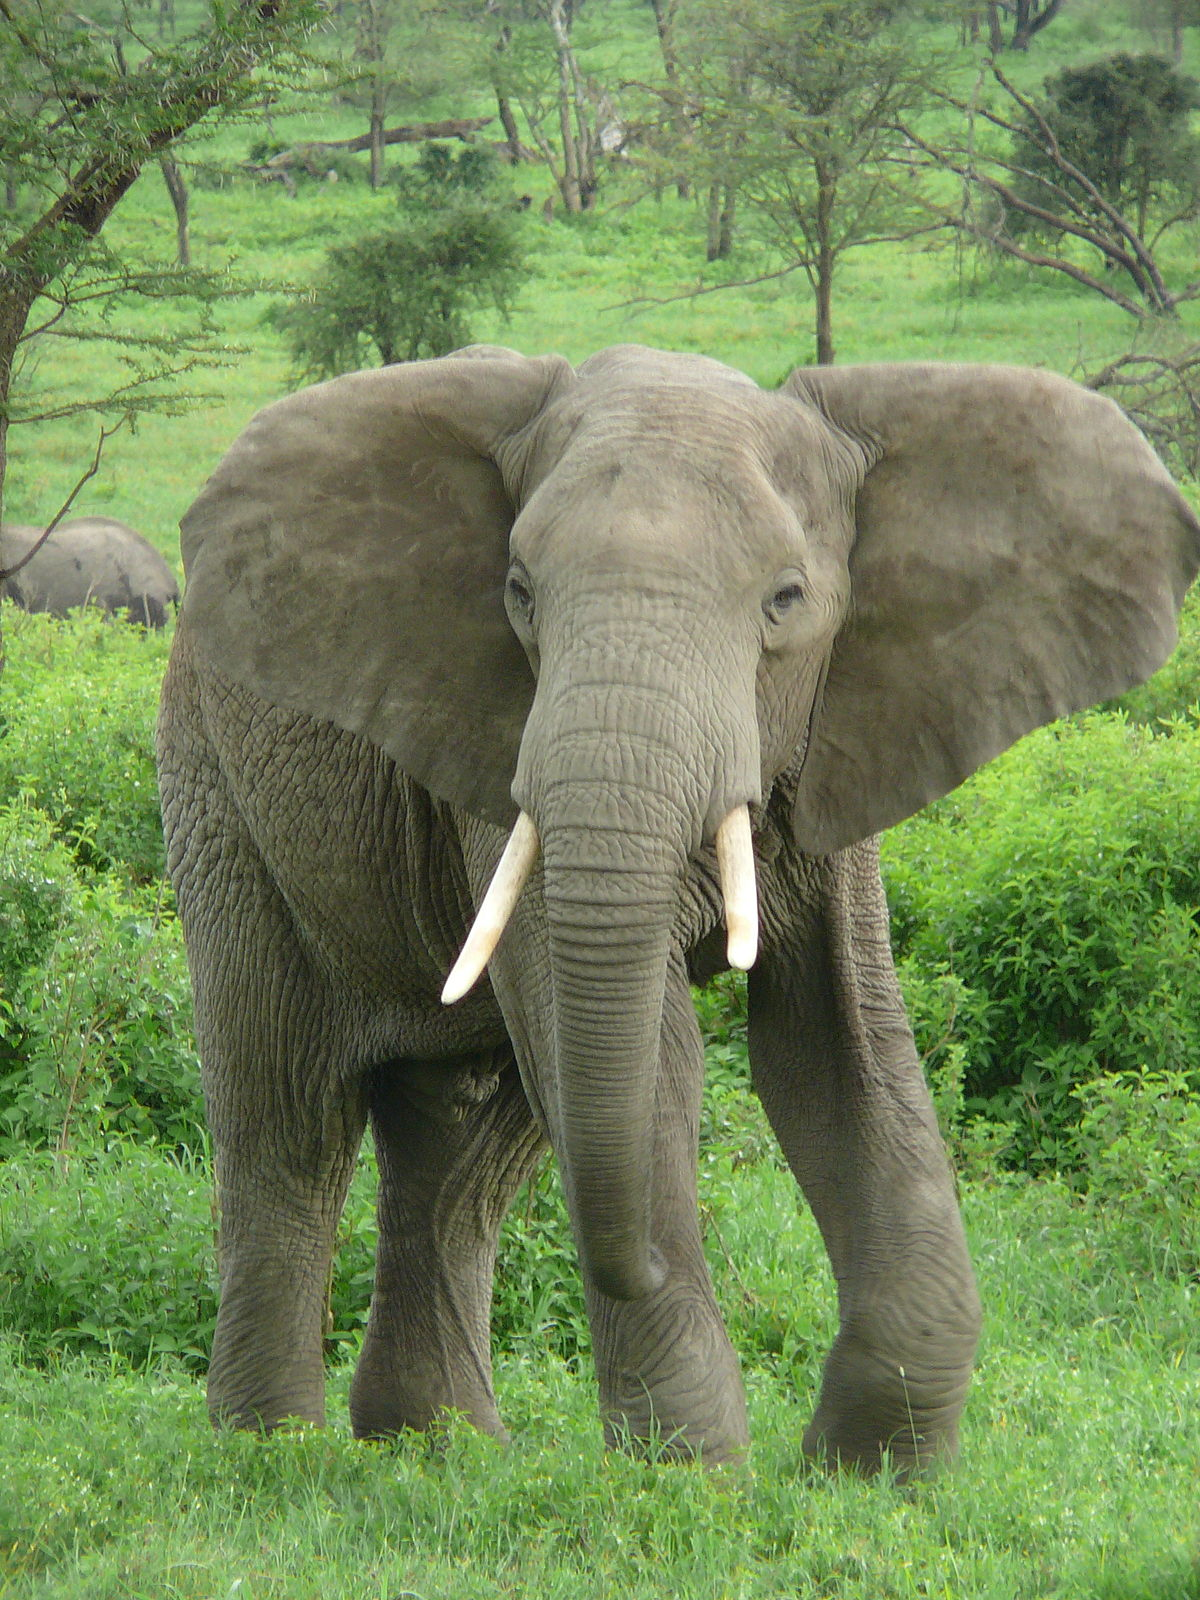

The duplicate is: 


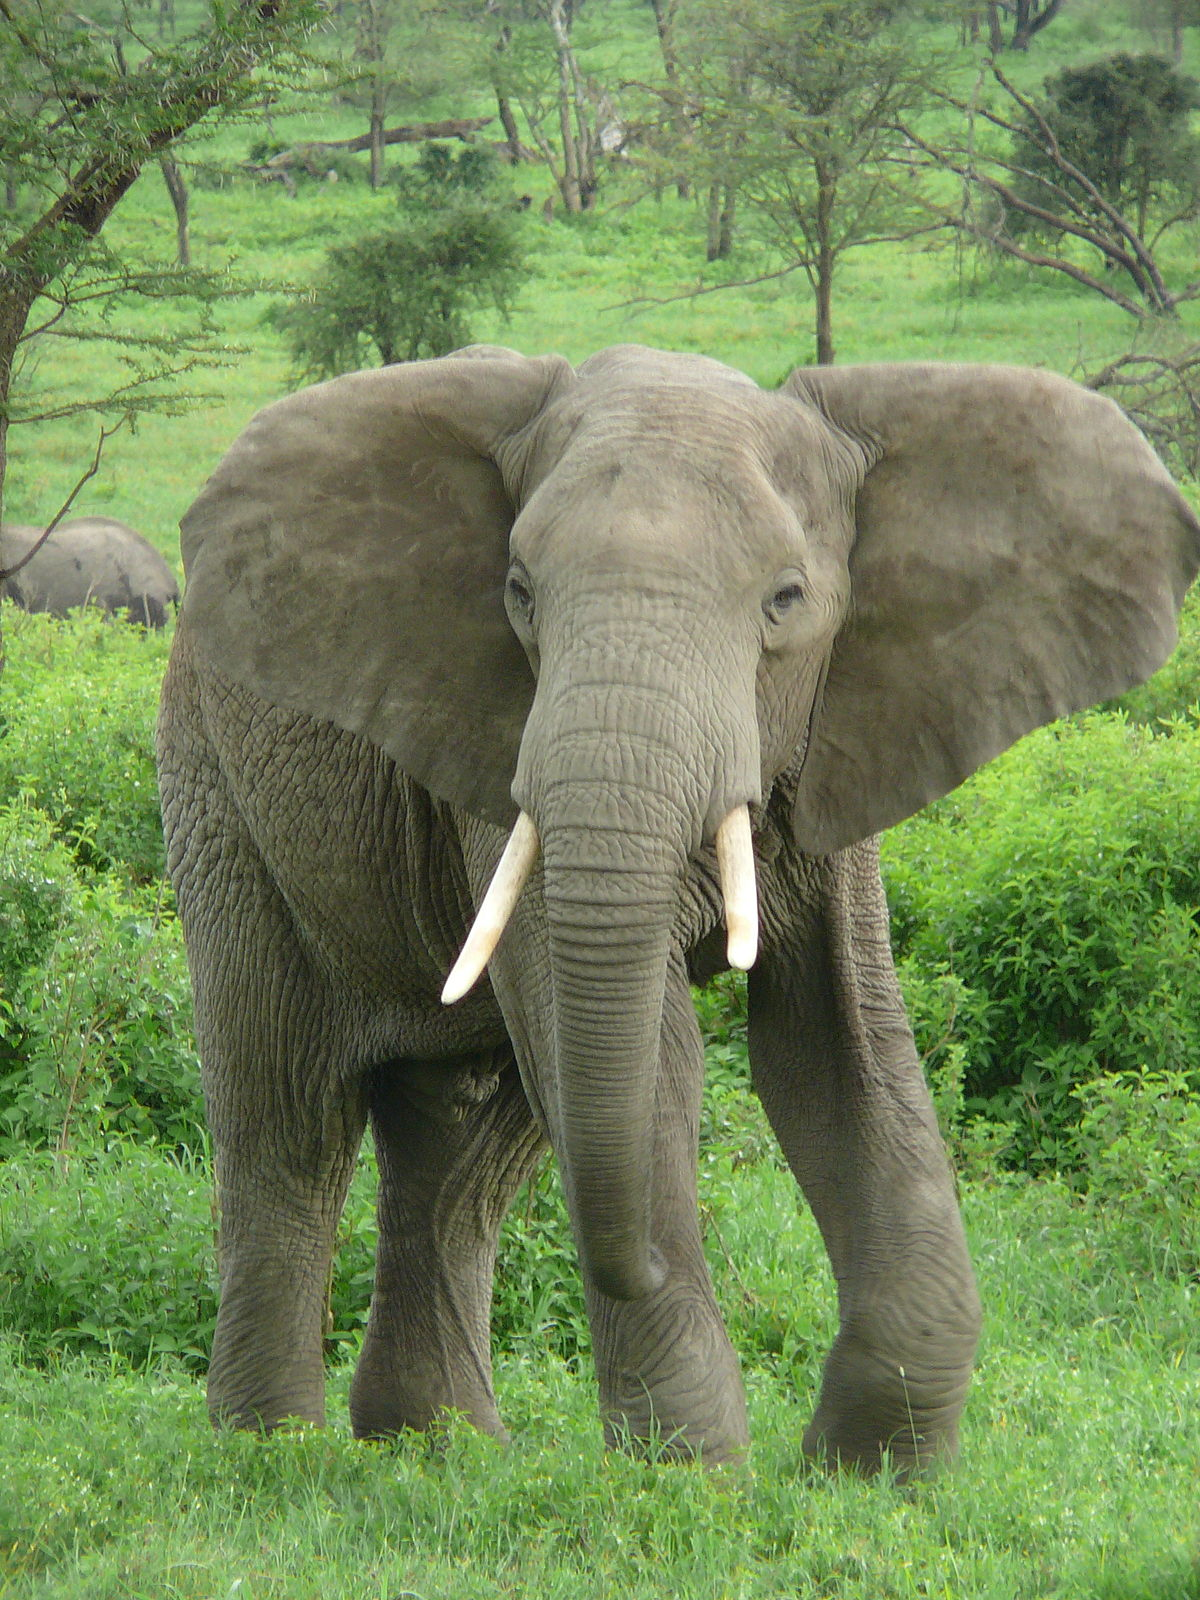

And the most similar images are:


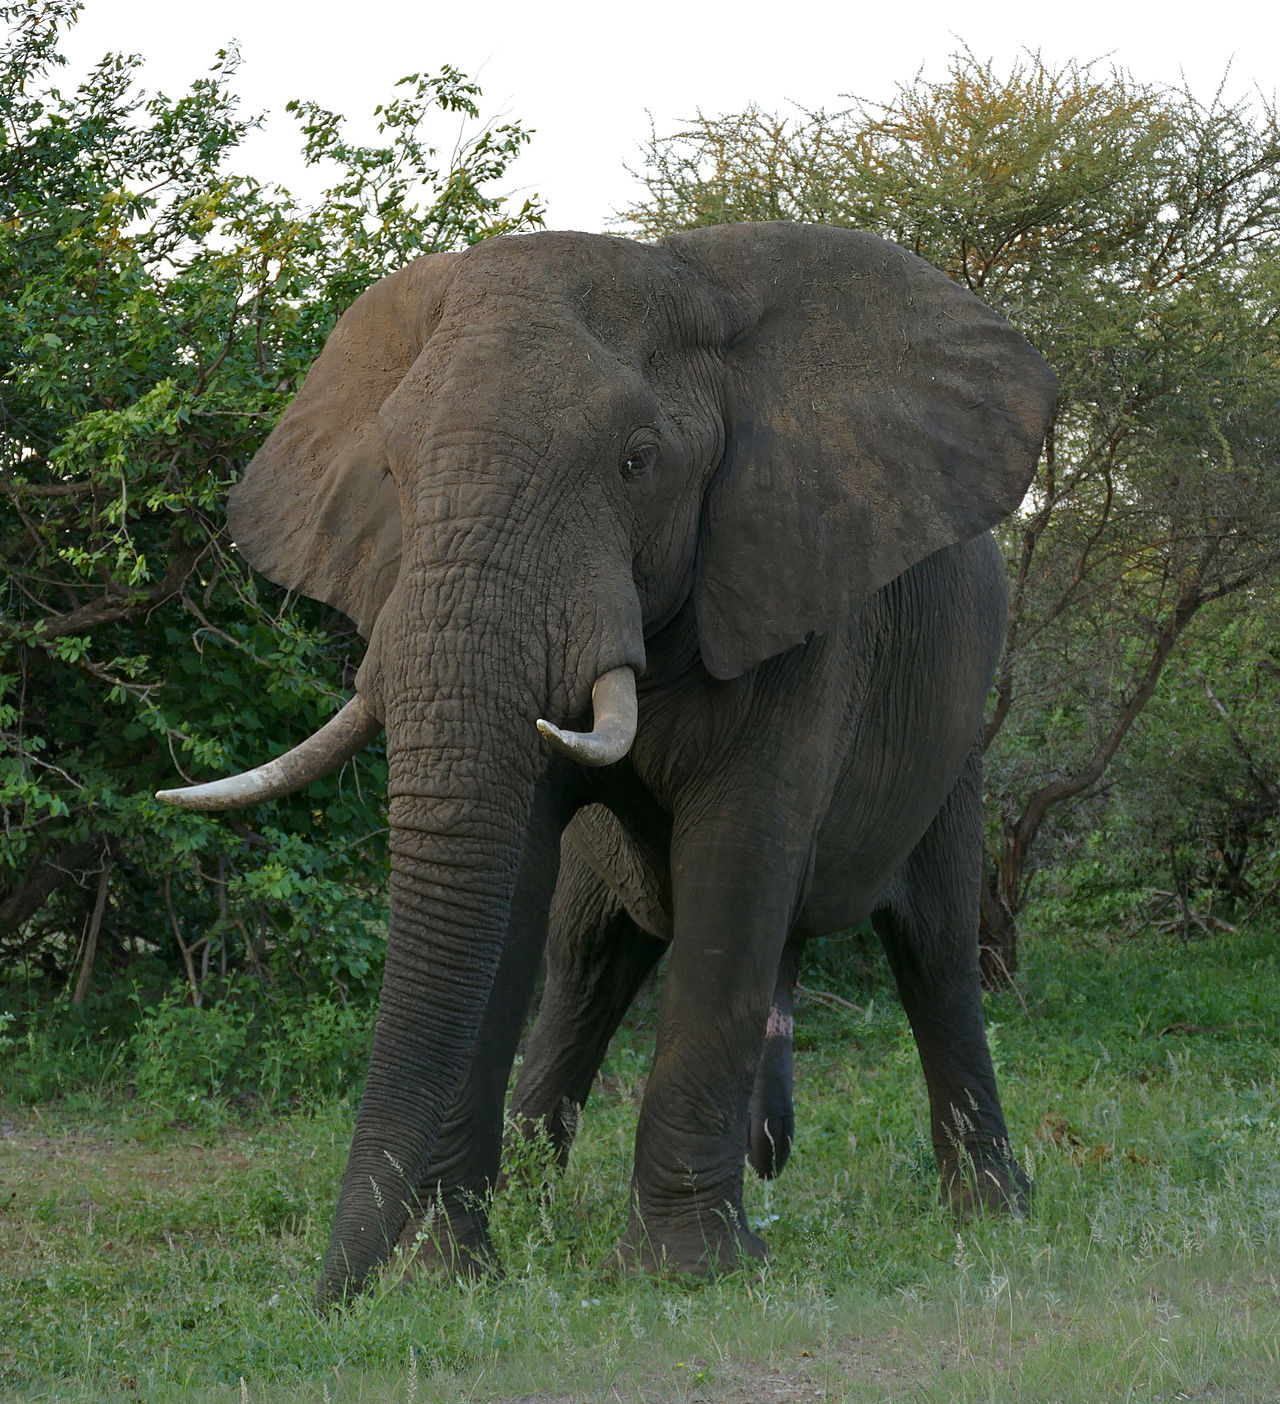

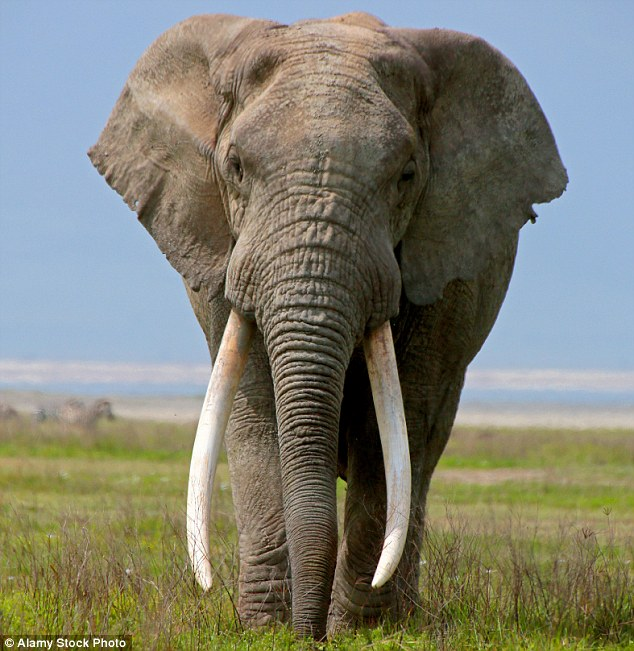

In [10]:
#display most similar images
from IPython.display import Image
from IPython.display import display

original_image = original_image
first = list(top_3.keys())[0]
second = list(top_3.keys())[1]
third = list(top_3.keys())[2]

#original image
img0 = Image(original_image, width = 400) 

#top 3
img1 = Image(first, width = 400) 
img2 = Image(second, width = 400) 
img3 = Image(third, width = 400)

print("The original image is:")
display(img0)
print('The duplicate is: ')
display(img1)
print('And the most similar images are:')
display(img2, img3)

### Exercise 
Now do this on your own dataset! 

In [ ]:
# YOUR CODE HERE